In [154]:
import pandas as pd
from datetime import date,datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [123]:
data = pd.read_csv('../Carsvago_cleaned_data.csv')


In [124]:
data.shape

(9930, 12)

In [125]:
data.isna().sum()

Unnamed: 0            0
Car_Name              0
Kms_driven            0
First_registration    0
Power                 0
Transmission          0
Fuel_type             0
Vendor                0
Location              0
Price_Euro            0
Drive_type            0
features_score        0
dtype: int64

In [126]:
data.reset_index(inplace=True)

In [89]:
data

,index,Unnamed: 0,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Location,Price_Euro,Drive_type,features_score
0,0,0,BMW 520 d 140 kW,32125.0,2019-01-01,140,Automatic,Diesel,Dealership,Germany,32899.0,2x4,2
1,1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63400.0,2018-07-01,147,Automatic,Diesel,Dealership,Germany,34649.0,4x4,2
2,2,2,Opel Grandland X 147 kW,2700.0,2020-06-01,147,Automatic,Hybrid,Dealership,Italy,35349.0,4x4,2
3,3,3,BMW 320 d 140 kW,26145.0,2021-03-01,140,Automatic,Diesel,Dealership,Germany,39349.0,2x4,2
4,4,4,BMW 320 d Sport Line 140 kW,28199.0,2021-02-01,140,Automatic,Diesel,Dealership,Germany,40099.0,2x4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,9925,10014,BMW 340 Gran Turismo i 240 kW,47800.0,2018-11-01,240,Automatic,Petrol,Dealership,Germany,37249.0,2x4,3
9926,9926,10015,Volvo V60 Momentum Pro 120 kW,16500.0,2021-04-01,120,Automatic,Petrol,Dealership,Germany,37249.0,2x4,3
9927,9927,10016,Audi S3 2.0 TFSI Quattro 228 kW,33002.0,2018-07-01,228,Automatic,Petrol,Dealership,Germany,40099.0,4x4,3
9928,9928,10017,Mercedes-Benz GLC 350 d 4Matic Coupe 190 kW,63000.0,2018-11-01,190,Automatic,Diesel,Used cars seller,Germany,42549.0,4x4,3


In [127]:
del data['Unnamed: 0']

In [91]:
data.dtypes

index                   int64
Car_Name               object
Kms_driven            float64
First_registration     object
Power                   int64
Transmission           object
Fuel_type              object
Vendor                 object
Location               object
Price_Euro            float64
Drive_type             object
features_score          int64
dtype: object

In [128]:
#calculation age
today = date.today()
data['age'] = 0
# today
# registered = datetime.strptime('2019-01-01', "%Y-%m-%d").date()
# age = today.year - registered.year - ((today.month,today.day) < (registered.month,registered.day))
# print(age)

for i in data.values:
        reg_year = datetime.strptime(data.loc[i[0],'First_registration'], "%Y-%m-%d").date()
        age = today.year - reg_year.year - ((today.month,today.day) < (reg_year.month,reg_year.day))
        data.loc[i[0],'age'] = age
    


In [93]:
data.head()

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Location,Price_Euro,Drive_type,features_score,age
0,0,BMW 520 d 140 kW,32125.0,2019-01-01,140,Automatic,Diesel,Dealership,Germany,32899.0,2x4,2,3
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63400.0,2018-07-01,147,Automatic,Diesel,Dealership,Germany,34649.0,4x4,2,3
2,2,Opel Grandland X 147 kW,2700.0,2020-06-01,147,Automatic,Hybrid,Dealership,Italy,35349.0,4x4,2,1
3,3,BMW 320 d 140 kW,26145.0,2021-03-01,140,Automatic,Diesel,Dealership,Germany,39349.0,2x4,2,1
4,4,BMW 320 d Sport Line 140 kW,28199.0,2021-02-01,140,Automatic,Diesel,Dealership,Germany,40099.0,2x4,2,1


In [129]:
temp_data = data.drop(labels='First_registration',axis=1)

## ANALYSING PRICE ATTRIBUTE

In [95]:
temp_data['Price_Euro'].describe()

count      9930.000000
mean      32254.886203
std       14611.654717
min        4049.000000
25%       21299.000000
50%       30699.000000
75%       41799.000000
max      264399.000000
Name: Price_Euro, dtype: float64

Skewness: 1.778600
Kurtosis: 15.398815


'\nWe can observe that the distribution of prices shows a high positive skewness \nto the left (skew > 1). A kurtosis value of 15 is high, meaning that\nthere is a profusion of outliers in the dataset. We need to do something.\n'

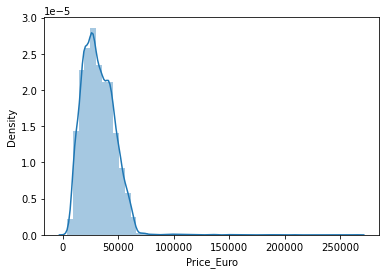

In [96]:
sns.distplot(temp_data['Price_Euro'])
#skewness and kurtosis
print("Skewness: %f" % temp_data['Price_Euro'].skew())
print("Kurtosis: %f" % temp_data['Price_Euro'].kurt())

"""
We can observe that the distribution of prices shows a high positive skewness 
to the left (skew > 1). A kurtosis value of 15 is high, meaning that
there is a profusion of outliers in the dataset. We need to do something.
"""

## RELATIONSHIP WITH NUMERICAL FEATURES

'\nWe see that the lesser is the mileage, the higher tends to be the price. \n'

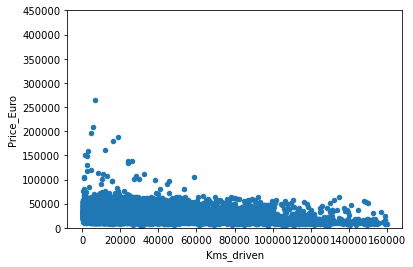

In [97]:
# Scatter plot Kms_driven / Price
attrib = 'Kms_driven'
data = pd.concat([temp_data['Price_Euro'], temp_data[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price_Euro', ylim=(0,450000));

"""
We see that the lesser is the mileage, the higher tends to be the price. 
"""

'\nPrices tend to be higher as cars are more recent, and viceversa.\n'

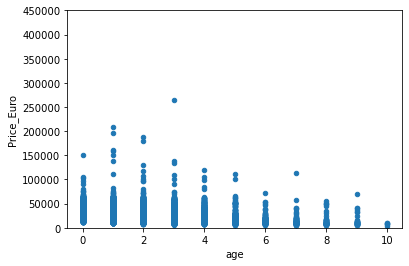

In [56]:
# Scatter plot age / Price
attrib = 'age'
data = pd.concat([temp_data['Price_Euro'], temp_data[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price_Euro', ylim=(0,450000));

"""
Prices tend to be higher as cars are more recent, and viceversa.
"""

'\nPrices tend to be higher as cars are more recent, and viceversa.\n'

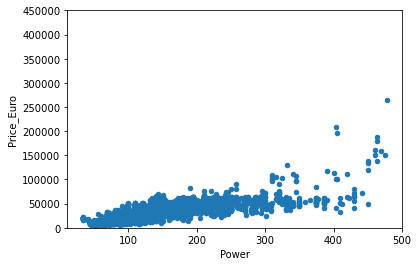

In [57]:
# Scatter plot power / Price
attrib = 'Power'
data = pd.concat([temp_data['Price_Euro'], temp_data[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price_Euro', ylim=(0,450000));

"""
Prices tend to be higher as cars power increases, and viceversa.
"""

## RELATIONSHIP WITH CATEGORICAL FEATURES

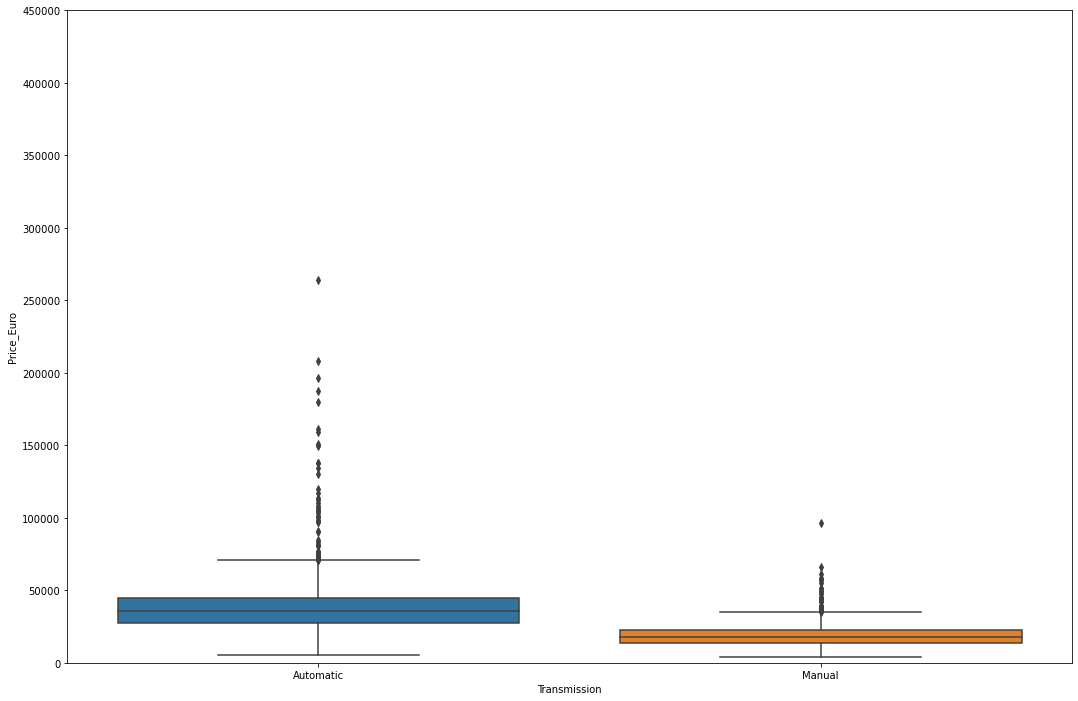

In [60]:
# Box plot Transmission / Price

attrib = 'Transmission'
data = pd.concat([temp_data['Price_Euro'], temp_data[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="Price_Euro", data=temp_data)
fig.axis(ymin=0, ymax=450000);

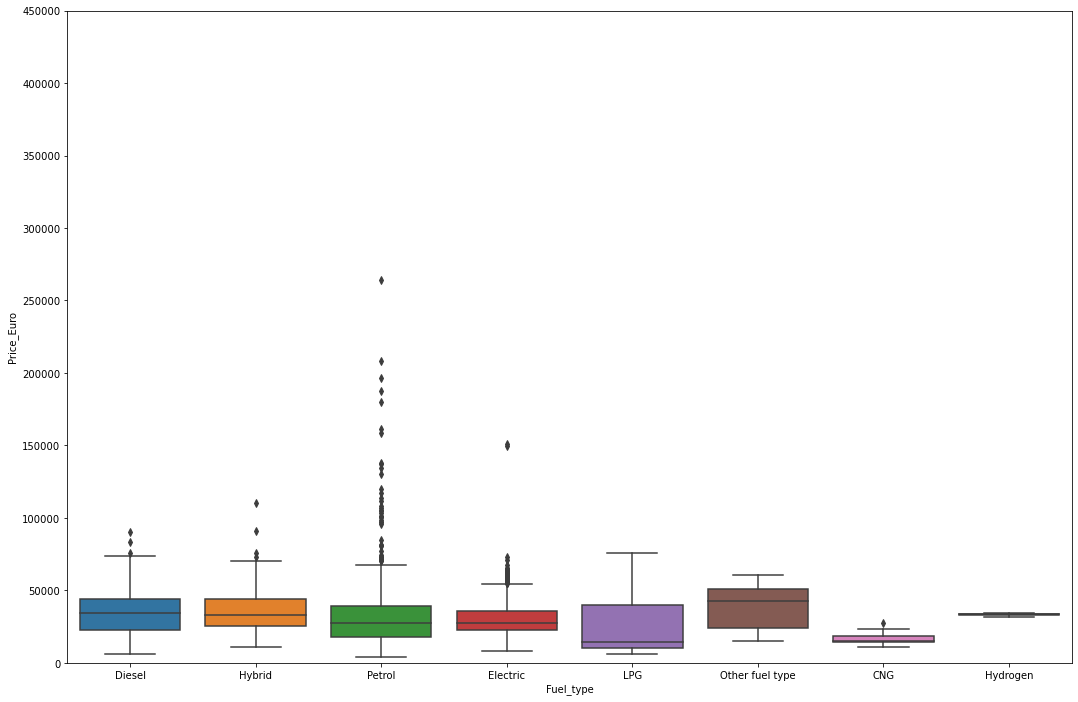

In [61]:
# Box plot Fuel_type / Price

attrib = 'Fuel_type'
data = pd.concat([temp_data['Price_Euro'], temp_data[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="Price_Euro", data=temp_data)
fig.axis(ymin=0, ymax=450000);

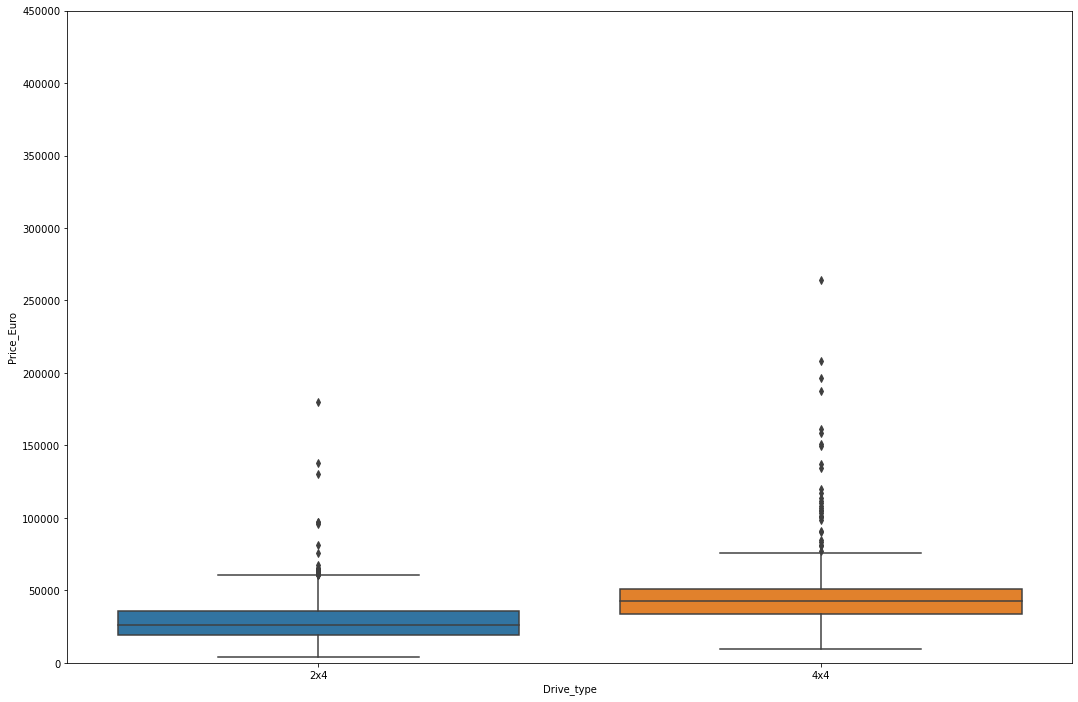

In [62]:
# Box plot Drive_type / Price

attrib = 'Drive_type'
data = pd.concat([temp_data['Price_Euro'], temp_data[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="Price_Euro", data=temp_data)
fig.axis(ymin=0, ymax=450000);

## FEATURE IMPORTANCE RELATED TO TARGET

In [66]:
# Find most important features relative to target Price
print("Find most important features relative to target")
corr = temp_data.corr()
corr.sort_values(["Price_Euro"], ascending = False, inplace = True)
print(corr.Price_Euro)

"""
Between Year and Price there is a positive correlation, meaning that the higher
is the Year (more recent), the higher is the Price (more recent cars cost more).
Between Price and Kms_driven there is a negative correlation, meaning that higher
is the Kms_driven, lower is the Price (cars with high Kms_driven cost less).

"""

Find most important features relative to target
Price_Euro        1.000000
Power             0.754012
index             0.076342
features_score   -0.048677
Kms_driven       -0.290612
age              -0.339597
Name: Price_Euro, dtype: float64


'\nBetween Year and Price there is a positive correlation, meaning that the higher\nis the Year (more recent), the higher is the Price (more recent cars cost more).\nBetween Price and Kms_driven there is a negative correlation, meaning that higher\nis the Kms_driven, lower is the Price (cars with high Kms_driven cost less).\n\n'

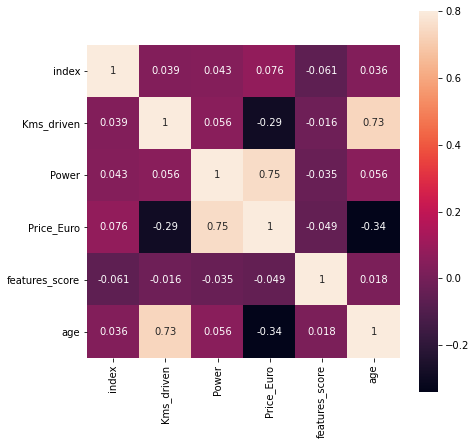

In [68]:
# General correlation matrix
corrmat = temp_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);


## SCATTERPLOTS

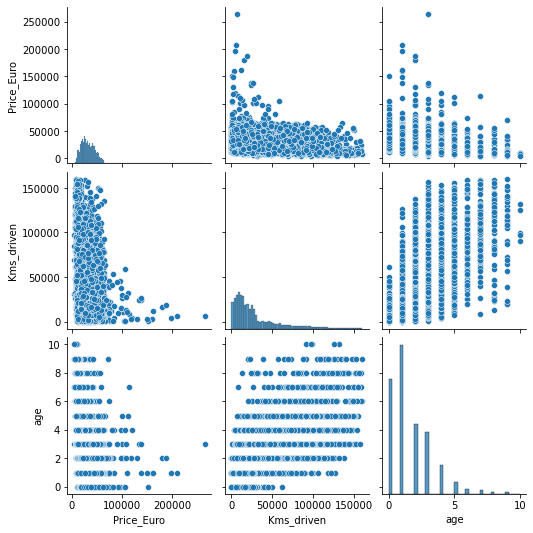

In [69]:
# Scatter plot for numerical features
num_features = ["Price_Euro", "Kms_driven", "age"]
sns.pairplot(temp_data[num_features], size = 2.5)
plt.show();

## PREPROCESSING

In [130]:
# Checking for missing values -> no missing values
temp_data.isnull().sum()

index             0
Car_Name          0
Kms_driven        0
Power             0
Transmission      0
Fuel_type         0
Vendor            0
Location          0
Price_Euro        0
Drive_type        0
features_score    0
age               0
dtype: int64

## OUTLIERS MANAGEMENT
BIVARIATE ANALYSIS

### REMOVING OUTLIERS BY MODEL

## LABEL ENCODING

In [131]:
# LABEL ENCODING
features = ['Transmission', 'Fuel_type','Vendor','Drive_type','Location']
les = {}

for f in features:    
    les[f] = LabelEncoder()
    les[f] = les[f].fit(temp_data[f])
    temp_data[f] = les[f].transform(temp_data[f])

In [132]:
temp_data.drop(labels='Car_Name',axis=1,inplace=True)

In [133]:
temp_data

,index,Kms_driven,Power,Transmission,Fuel_type,Vendor,Location,Price_Euro,Drive_type,features_score,age
0,0,32125.0,140,0,1,0,3,32899.0,0,2,3
1,1,63400.0,147,0,1,0,3,34649.0,1,2,3
2,2,2700.0,147,0,3,0,4,35349.0,1,2,1
3,3,26145.0,140,0,1,0,3,39349.0,0,2,1
4,4,28199.0,140,0,1,0,3,40099.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9925,9925,47800.0,240,0,7,0,3,37249.0,0,3,3
9926,9926,16500.0,120,0,7,0,3,37249.0,0,3,0
9927,9927,33002.0,228,0,7,0,3,40099.0,1,3,3
9928,9928,63000.0,190,0,1,1,3,42549.0,1,3,3


## Seperating X and y

In [134]:
X = temp_data.drop(labels='Price_Euro',axis=1)
y = temp_data[['Price_Euro']]

## Scaling data

In [135]:
std_sclr = StandardScaler()
col = X.columns
X = pd.DataFrame(std_sclr.fit_transform(X))
X.columnsumns = col
X

,0,1,2,3,4,5,6,7,8,9
0,-1.731876,0.097008,0.137947,-0.573707,-0.923635,-0.223145,-0.295115,-0.635399,-0.429086,0.836192
1,-1.731528,1.176636,0.267091,-0.573707,-0.923635,-0.223145,-0.295115,1.573814,-0.429086,0.836192
2,-1.731179,-0.918758,0.267091,-0.573707,-0.199373,-0.223145,0.104952,1.573814,-0.429086,-0.398879
3,-1.730830,-0.109425,0.137947,-0.573707,-0.923635,-0.223145,-0.295115,-0.635399,-0.429086,-0.398879
4,-1.730481,-0.038520,0.137947,-0.573707,-0.923635,-0.223145,-0.295115,-0.635399,-0.429086,-0.398879
...,...,...,...,...,...,...,...,...,...,...
9925,1.730481,0.638116,1.982865,-0.573707,1.249153,-0.223145,-0.295115,-0.635399,0.730006,0.836192
9926,1.730830,-0.442375,-0.231037,-0.573707,1.249153,-0.223145,-0.295115,-0.635399,0.730006,-1.016415
9927,1.731179,0.127282,1.761475,-0.573707,1.249153,-0.223145,-0.295115,1.573814,0.730006,0.836192
9928,1.731528,1.162828,1.060406,-0.573707,-0.923635,4.481384,-0.295115,1.573814,0.730006,0.836192


## Train test split

In [136]:
# Splitting the dataset into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=23,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7944, 10), (1986, 10), (7944, 1), (1986, 1))

In [137]:

GBR = GradientBoostingRegressor()

In [140]:
    parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,700, 900],
                  'max_depth'    : [4,6,8,10]
                 }

In [144]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 700, 900],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [145]:
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.8758399447450904

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.2}


In [147]:
Final_GBModel = GradientBoostingRegressor(learning_rate=0.01,max_depth=10,n_estimators=500,subsample=0.2)

In [148]:
Final_GBModel.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=500,
                          subsample=0.2)

## Model testing and evaluation using training data

In [149]:
y_train_pred = Final_GBModel.predict(X_train)

In [151]:
print('model accuracy or R2 squared :',Final_GBModel.score(X_train,y_train))

model accuracy or R2 squared : 0.9492918580913311


In [155]:
print('mean squared error mse : ',mean_absolute_error(y_train,y_train_pred))

mean squared error mse :  2367.56062047402


## Model testing and evaluation using test data

In [156]:

y_test_pred = Final_GBModel.predict(X_test)


In [158]:
print('accuracy of model: r2 squared: ',Final_GBModel.score(X_test,y_test))


accuracy of model: r2 squared:  0.8828238635813677


In [161]:

print('mean squared errro : ',mean_absolute_error(y_test,y_test_pred))


mean squared errro :  3100.801946951291
